# U.S. COVID-19 Vaccinations: Supply and Patient Therapy

Data Exploration and Analysis | DSC-530 T301 <br>
Jeremy Barton <br>
07.04.2025

<b>Appendix</b>

[Introduction](#introduction)

[Preprocessing & Preliminary Preparation](#preprocessing-&-preliminary-preparation)

1. [Data Selection](#data-selection)
2. [Data Cleaning and Preparation](#data-cleaning-and-preparation)

[Exploratory Data Analysis](#exploratory-data-analysis)

1. [Describe the Variable Characteristics with Summary Statistics](#describe-the-variable-characteristics-with-summary-statistics) 
2. [Conduct Univariate Analysis](#conduct-univariate-analysis)
3. [Conduct Bivariate Analysis](#conduct-bivariate-analysis)
4. [Test Statistics](#test-statistics)
5. [Regression and Classification](#regression-and-classification)
6. [Advanced Analysis Techniques](#advanced-analysis-techniques)
7. [Conclusion](#Conclusion)

#### <b>Introduction</b>

The purpose of this paper is to conduct a comprehensive exploratory data analysis on a real-world dataset, utilizing various statistical techniques, visualization methods, and advanced methods to uncover insights, patterns, and relationships between variables. 

#### <b>Preprocessing & Preliminary Preparation</b>

In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_rel
from scipy.stats import f_oneway
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from ml_utils.pca import pca_scatter_3d
from ml_utils.pca import pca_scatter
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier


vax_data = pd.read_csv('/home/jeremy/Documents/GitHub/DSC530/TermProject/data/vax_totals.csv')
vaccine_eda = vax_data
cleaned_eda = vaccine_eda.copy
vaccine_eda.head(3)

,Date,MMWR_week,Location,Distributed,Administered,Admin_Per_100K,Recip_Administered,Administered_Dose1_Recip,Series_Complete_Yes,Additional_Doses,Second_Booster,Administered_Bivalent
0,10/30/2021,43,TX,44779195,34509513,119015,33678095,17794025,15467426,1448444.0,NaN,NaN
1,10/30/2021,43,NJ,15160695,12301100,138492,12664320,6662856,5892769,526010.0,NaN,NaN
2,12/27/2020,53,PA,291825,84826,663,0,0,0,NaN,NaN,NaN


##### Data Selection

Checking the shape of this dataset.

In [2]:
vaccine_eda.shape

(38488, 12)

38,488 records should be suitable for what we will be conducting in this paper.

This data is provided by the United States Center for Disease Control (CDC) and the descriptions clearly indicate the role of each field. 

##### Data Cleaning and Preparation

Fill NaN values

In [3]:
vax_data.fillna(0)

,Date,MMWR_week,Location,Distributed,Administered,Admin_Per_100K,Recip_Administered,Administered_Dose1_Recip,Series_Complete_Yes,Additional_Doses,Second_Booster,Administered_Bivalent
0,10/30/2021,43,TX,44779195,34509513,119015,33678095,17794025,15467426,1448444.0,0.0,0.0
1,10/30/2021,43,NJ,15160695,12301100,138492,12664320,6662856,5892769,526010.0,0.0,0.0
2,12/27/2020,53,PA,291825,84826,663,0,0,0,0.0,0.0,0.0
3,12/27/2020,53,AK,45250,11427,1562,0,0,0,0.0,0.0,0.0
4,12/16/2020,51,WI,49725,192,3,0,0,0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
38483,12/13/2020,51,AS,3900,0,0,0,0,0,0.0,0.0,0.0
38484,12/13/2020,51,VI,975,0,0,0,0,0,0.0,0.0,0.0
38485,12/13/2020,51,MP,4875,0,0,0,0,0,0.0,0.0,0.0
38486,12/13/2020,51,US,13650,0,0,0,0,0,0.0,0.0,0.0


## <b>Exploratory Data Analysis (EDA) Tasks</b>

### <b>Describe the Variable Characteristics with Summary Statistics</b>

<b>a. Provide description of the variables you are using in this project.</b>

####

In this paper, we are claiming that the supply of vaccines have affect the length of a patient's progression. More specifically, what impacts a surplus or deficit of vaccines (compared to the distribution of most) has on the completion of a second dose, booster, and additional doses.

The following are descriptions of variables used in the analysis. This is a subset containing totals from the full vaccinations dataset.

`Date`: Date data was reported on the CDC COVID Data Tracker

`MMWR`: Week of the epidemioligic year

`Location`: Jurisdictions (State/Territory/Federal Entity)

`Distributed`: Total number of deivered doses

`Administered`: Total number of administered doses based on the jurisdiction

`Recip_Administered`: Total number of doses administered based on the jurisdiction where recipient lives

`Series Complete`: Total number of people with a completed primary series (have second dose of a two-dose vaccine or one dose of a single-dose vaccine) based on the jurisdiction where recipient lives

`Additional Doses`: Total number of people who completed a primary series and have received a booster (or additional) dose.

`Second Booster`: Total number of people who have received a second booster dose in the US

`Bivalent`: Total number of people who have received an updated (bivalent) booster dose since September 1, 2022

In [4]:
# Statistical Summary
describe = vaccine_eda.describe()
pd.DataFrame(describe)

,MMWR_week,Distributed,Administered,Admin_Per_100K,Recip_Administered,Administered_Dose1_Recip,Series_Complete_Yes,Additional_Doses,Second_Booster,Administered_Bivalent
count,38488.000000,3.848800e+04,3.848800e+04,38488.000000,3.848800e+04,3.848800e+04,3.848800e+04,2.214000e+04,1.030000e+02,2.240000e+03
mean,23.434447,1.543719e+07,1.200731e+07,106028.730799,1.189764e+07,5.850952e+06,4.848940e+06,2.193483e+06,2.334271e+07,1.314796e+06
std,15.406757,6.751604e+07,5.312774e+07,65372.181129,5.313508e+07,2.537368e+07,2.142915e+07,1.008537e+07,1.465661e+07,5.600637e+06
min,1.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.065193e+06,0.000000e+00
25%,10.000000,9.751162e+05,7.383708e+05,57268.000000,5.764495e+05,3.316222e+05,1.374512e+05,2.103900e+04,1.204474e+07,1.015578e+05
50%,20.000000,3.837018e+06,2.961704e+06,112583.500000,2.870142e+06,1.497842e+06,1.147482e+06,4.793090e+05,1.638629e+07,3.213310e+05
75%,36.000000,1.004543e+07,7.860668e+06,153463.250000,7.711791e+06,3.907152e+06,3.263232e+06,1.502269e+06,3.802322e+07,9.155545e+05
max,53.000000,9.844443e+08,6.767288e+08,302852.000000,6.767288e+08,2.702272e+08,2.306373e+08,1.184383e+08,4.883936e+07,5.751261e+07


### <b>Conduct Univariate Analysis</b>

<b>a. Calculate descriptive statistics (mean, median, mode, variance, skewness, kurtosis) of the key variables in your dataset</b>

####

In [5]:
# This option disables scientific notation 
pd.set_option('display.float_format', '{:.0f}'.format)

# Group and compute mean
vaccine_stats = (
    vaccine_eda
    .groupby("Location", as_index=False)
    .agg({"Distributed": "mean", "Administered": "mean"})
)

# Fill NaNs with zero
vaccine_stats = vaccine_stats.fillna(0)

# Rename columns
vaccine_stats.rename(columns={
    "Distributed": "Avg Dist",
    "Administered": "Avg Admin"
}, inplace=True)

# Median
vaccine_stats["Med Dist"] = (
    vaccine_eda.groupby("Location")["Distributed"].median()
    .reindex(vaccine_stats["Location"]).fillna(0).values
)
vaccine_stats["Med Admin"] = (
    vaccine_eda.groupby("Location")["Administered"].median()
    .reindex(vaccine_stats["Location"]).fillna(0).values
)

# Mode
vaccine_stats["Mode Dist"] = (
    vaccine_eda.groupby("Location")["Distributed"]
    .apply(lambda x: x.mode().iloc[0] if not x.mode().empty else np.nan)
    .reindex(vaccine_stats["Location"]).fillna(0).values
)
vaccine_stats["Mode Admin"] = (
    vaccine_eda.groupby("Location")["Administered"]
    .apply(lambda x: x.mode().iloc[0] if not x.mode().empty else np.nan)
    .reindex(vaccine_stats["Location"]).fillna(0).values
)

# Kurtosis
vaccine_stats["Kurt Dist"] = (
    vaccine_eda.groupby("Location")["Distributed"]
    .apply(pd.Series.kurt)
    .reindex(vaccine_stats["Location"]).fillna(0).values
)
vaccine_stats["Kurt Admin"] = (
    vaccine_eda.groupby("Location")["Administered"]
    .apply(pd.Series.kurt)
    .reindex(vaccine_stats["Location"]).fillna(0).values
)

vaccine_stats

,Location,Avg Dist,Avg Admin,Med Dist,Med Admin,Mode Dist,Mode Admin,Kurt Dist,Kurt Admin
0,AK,1060955,779085,1089275,810238,271550,946031,-0,-1
1,AL,6365886,4153595,6829510,4624892,39000,5191035,-1,-1
2,AR,4014389,2815701,4161500,3085323,25350,40879,-1,-1
3,AS,72018,63402,67550,63123,54030,0,-1,-1
4,AZ,9893396,7959849,10143070,8370474,58500,9458251,-1,-1
...,...,...,...,...,...,...,...,...,...
61,VT,1146741,929108,1075350,917788,22125,1101607,-1,-1
62,WA,11702485,9547576,11675975,9864304,221150,11228003,-1,-1
63,WI,7740788,6820004,7710425,6936268,49725,8080069,-1,-1
64,WV,2691873,1763784,3032115,1567789,16575,1689798,-1,-1


<b> b. Create visualization of the key variables to examine distribution or patterns  </b>

####

The key varibles in this analysis are Adminstered, Distributed, (predictor variable) and Series Complete, Additional Dose, Second booster and Bivalent (target variable). We will begin with a histogram distribution of the mean Administered Doses. This distribution is identical the Distributed field.

There is an outlier in the data that we can see visually, which is the "US" category. It makes up several territories, so to limit the scope it will be removed. We are interested only in the fifty states of the United States of America.

array(['AK', 'AL', 'AR', 'AS', 'AZ', 'BP2', 'CA', 'CO', 'CT', 'DC', 'DD2',
       'DE', 'FL', 'FM', 'GA', 'GU', 'HI', 'IA', 'ID', 'IH2', 'IL', 'IN',
       'KS', 'KY', 'LA', 'LTC', 'MA', 'MD', 'ME', 'MH', 'MI', 'MN', 'MO',
       'MP', 'MS', 'MT', 'NC', 'ND', 'NE', 'NH', 'NJ', 'NM', 'NV', 'NY',
       'OH', 'OK', 'OR', 'PA', 'PR', 'PW', 'RI', 'RP', 'SC', 'SD', 'TN',
       'TX', 'UT', 'VA', 'VA2', 'VI', 'VT', 'WA', 'WI', 'WV', 'WY'],
      dtype=object)

/home/jeremy/Documents/GitHub/DSC530/env/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "orientation" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/home/jeremy/Documents/GitHub/DSC530/env/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "facecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/home/jeremy/Documents/GitHub/DSC530/env/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "edgecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/home/jeremy/Documents/GitHub/DSC530/env/lib/py

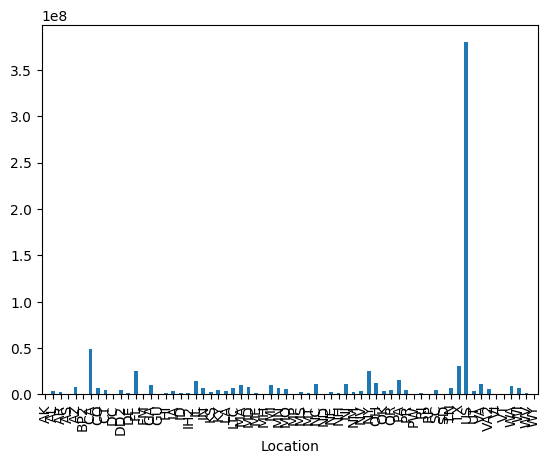

In [6]:
#vaccine_stats.groupby('Location')['Avg. Admin'].sum().plot(kind='bar')
vaccine_stats.groupby('Location')['Avg Admin'].sum().plot(kind='bar')
vaccine_stats = vaccine_stats[vaccine_stats['Location'] != 'US']
vaccine_eda = vaccine_eda[vaccine_eda['Location'] != 'US']
vaccine_eda = vaccine_eda[vaccine_eda['Location'] != 'US']
vaccine_stats["Location"].unique()

We can also tell the data is not standardized as the mean is not zero.


In [7]:
eda_mean = vaccine_eda['Administered'].mean()
std = vaccine_eda.select_dtypes(include='number').std()
eda_mean
std

MMWR_week                        15
Distributed                13152085
Administered                9761370
Admin_Per_100K                65458
Recip_Administered          9763006
Administered_Dose1_Recip    4645985
Series_Complete_Yes         3912521
Additional_Doses            1913013
Second_Booster                  NaN
Administered_Bivalent       1018548
dtype: float64

In order to standardize it, we use the `MinMaxScaler` from sci-kit learn.

In [8]:
# This is to apply fitting to numeric columns only
n = vaccine_eda.select_dtypes(include='number') # Safety first.

vaccine_eda[n.columns] = (n - n.mean()) / n.std()


Let's revisit the distribution.

In [9]:
eda_mean = vaccine_eda['Administered'].mean()
std = vaccine_eda.select_dtypes(include='number').std()
eda_mean
std


MMWR_week                    1
Distributed                  1
Administered                 1
Admin_Per_100K               1
Recip_Administered           1
Administered_Dose1_Recip     1
Series_Complete_Yes          1
Additional_Doses             1
Second_Booster             NaN
Administered_Bivalent        1
dtype: float64

/home/jeremy/Documents/GitHub/DSC530/env/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "orientation" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/home/jeremy/Documents/GitHub/DSC530/env/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "facecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/home/jeremy/Documents/GitHub/DSC530/env/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "edgecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/home/jeremy/Documents/GitHub/DSC530/env/lib/py

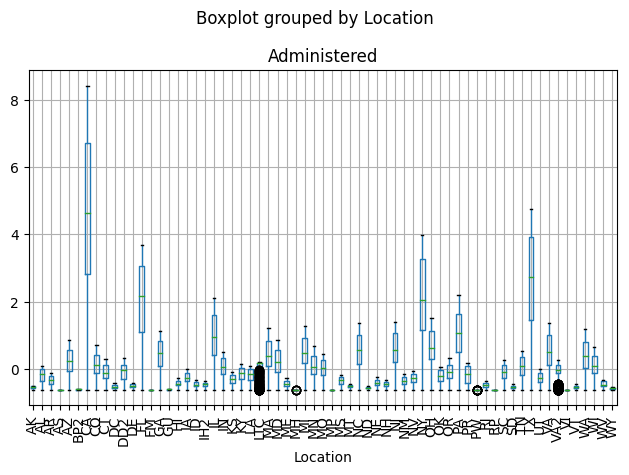

In [10]:
vaccine_eda.boxplot(column='Administered', by='Location', rot=90)
plt.tight_layout()
plt.show()

New York is expected to have the highest number of adminstered vaccines due to it's population. This is supported by the volume (and high-points) of other known highly populated states like New Jersey and Pennsylvania.

Because of this we can determine there are no significant outliers. Therefore no trimming is needed.

### <b>Conduct Bivariate Analysis</b>

<b>a. Calculate covariance and correlation</b>

####

In [11]:
vaccine_corr = vaccine_eda.select_dtypes(include='number')
vaccine_corr = vaccine_corr.drop('Admin_Per_100K', axis=1)
vaccine_corr = vaccine_corr.fillna(0)
vax_data.shape


(38488, 12)

We will use the Person correlation to calculate covariance and correlation between the variables in `vaccine_eda`.

<AxesSubplot:>

/home/jeremy/Documents/GitHub/DSC530/env/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "orientation" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/home/jeremy/Documents/GitHub/DSC530/env/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "facecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/home/jeremy/Documents/GitHub/DSC530/env/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "edgecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/home/jeremy/Documents/GitHub/DSC530/env/lib/py

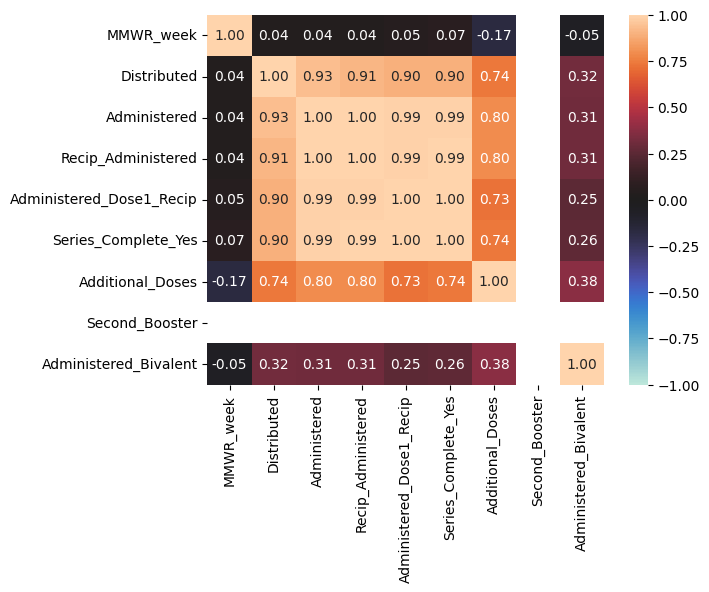

In [12]:
sns.heatmap(vaccine_corr.corr(), vmin=-1, vmax=1, center=0, annot=True, fmt='.2f')

Each cell shows the correclation coefficient between two variables. A perfect correlation means the relationship is reciprical. As one increases or decreases, so does the other.

+1.00 represemts perfect positive correlation <br>
0.00 is no linear correlation <br>
-1.00 represent perfect nefatice correlation

Focusing in on the variables we're interested in for the analysis, it looks like the number of vaccines Adminstered and Distributed has had a near perfect correlation with the different stages of therapy completion.

Between `Distributed` and `Administered` there is a <b>97 - 99%</b> correlation with those who complete a Series (meaning sucessfully completed a first and second dose to complete the first administration). This is expected, and what we would hope the outcome would be for a completed series.

However, this correlation decreases the further on patient therapy is. By the time we reach patients who have had continued therapy, represented by `Administered_Bivalent` there is a less than 35% correlation.



<b>IMPORTANT NOTE:</b><br>
It may have occured to us that the `Second_Booster` field isn't included in the above heatmap. This is because the 'US' field dropped earlier from `Location` included all patients who received a second booster. If we were to include that field in our heatmap it will follow a similar trend to the other therapy stages.

<AxesSubplot:>

/home/jeremy/Documents/GitHub/DSC530/env/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "orientation" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/home/jeremy/Documents/GitHub/DSC530/env/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "facecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/home/jeremy/Documents/GitHub/DSC530/env/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "edgecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/home/jeremy/Documents/GitHub/DSC530/env/lib/py

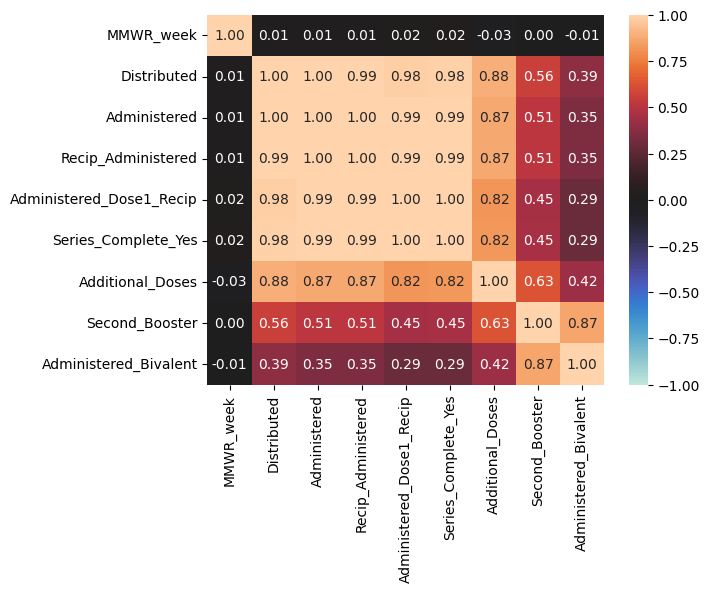

In [14]:
vaccine_eda = vax_data
vaccine_eda.fillna(0)

vaccine_eda = vaccine_eda.select_dtypes(include='number')
vaccine_eda = vaccine_eda.drop('Admin_Per_100K', axis=1)
vaccine_eda = vaccine_eda.fillna(0)
vaccine_eda.shape

sns.heatmap(vaccine_eda.corr(), vmin=-1, vmax=1, center=0, annot=True, fmt='.2f')

The administration and distribution of vaccines had a 51 - 56% correlation with recieving a second booster.

This version of the dataset containing the outlier will be included in the exploratory data analysis moving forward. It is not expected that this will cause an issue in predicting stage completion.

<b>b. Create visualization</b>

####

We will continue the EDA by creating a pair plot on the vaccine_eda. 

/home/jeremy/Documents/GitHub/DSC530/env/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "orientation" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/home/jeremy/Documents/GitHub/DSC530/env/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "facecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/home/jeremy/Documents/GitHub/DSC530/env/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "edgecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/home/jeremy/Documents/GitHub/DSC530/env/lib/py

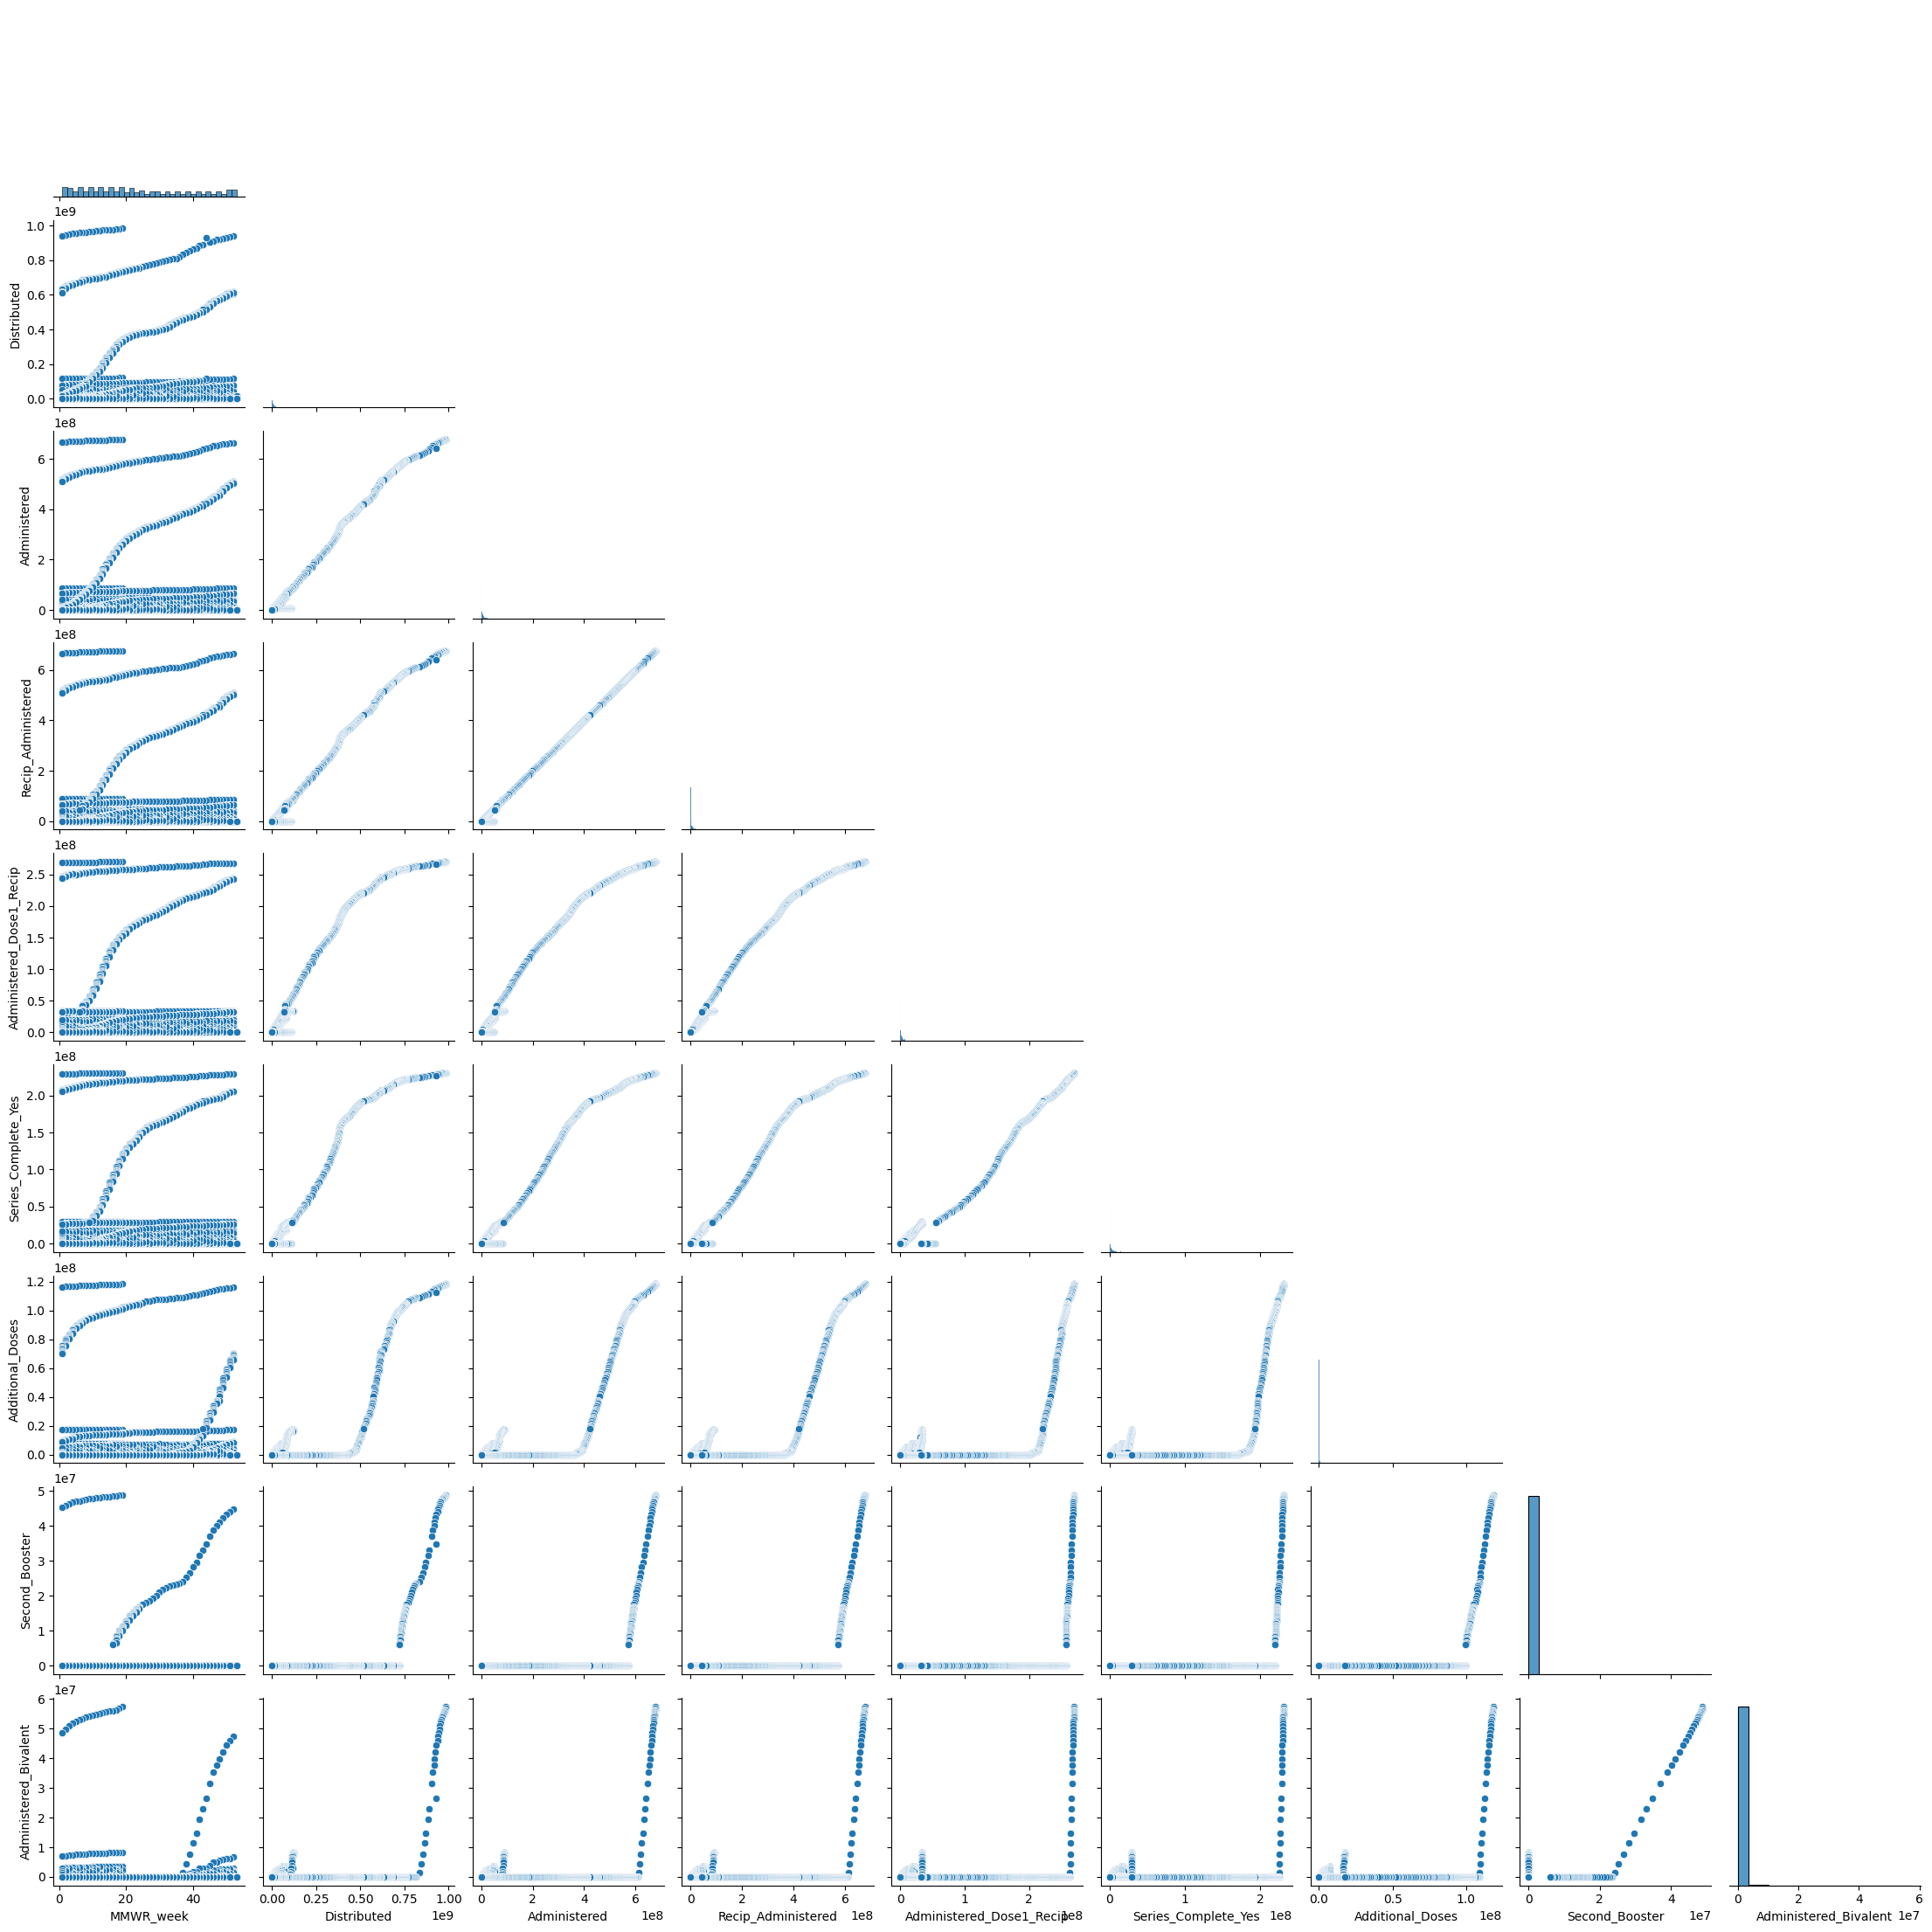

In [15]:
sns.pairplot(vaccine_eda, corner=True)

We can infer from the above pairplot that there is strong positve correlation between all of our diagonal cells.

### <b>Test Statistics</b>

<b>a. Develop a hypothesis and select the appropriate test statistics based on your data.</b>

####

The hypothsis for this analysis is that Administered or Distributed levels have an affect on the stages of therapy continuation. We've proved in the previous section that the correlation between our control variables and the completion stages is from 98% on the first dose down to 39% for continued vaccinations.

However since correlation does not equal causation, statistical tests must be performed to prove the significance of the control variables. 

<b>b. For each test (e.g., t-test, F-test, Chi-squared), be sure to discuss the assumptions and whether they hold for your dataset </b>

####

<b>The t-test</b>
#####

A t-test compared the means of groups to determine if they're statistically different. For this test we're comparing whether the mean between Administered and Distributed is statistically different. This will help us understand any gaps between supply and demand.

In [16]:
# Performing a T test

t_stat, p_val = ttest_rel(vaccine_eda['Administered'], vaccine_eda['Distributed'])

print(f"t-statistic: {t_stat}, p-value: {p_val}")


t-statistic: -43.79709557284322, p-value: 0.0


A T-stat of -43.8 is very low, which shows an extremely strong difference in the two variables. This means there were significantly less Admnistered than Distributed.

Knowing this helps to gain a clearer understanding of the data. Choosing one or the other to represent Supply will return innaccurate results. To now add a `Supply` column to the vaccine_eda table we cam subtract the Administered from the Distributed.

In [17]:
vaccine_eda['Supply'] = vaccine_eda['Distributed'] - vaccine_eda['Administered']
vaccine_eda = vaccine_eda.drop(columns=['Distributed', 'Administered'])

Returning to the correlation heatmap with a new Supply field.

In [18]:
vaccine_stats = vaccine_eda.copy()


<AxesSubplot:>

/home/jeremy/Documents/GitHub/DSC530/env/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "orientation" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/home/jeremy/Documents/GitHub/DSC530/env/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "facecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/home/jeremy/Documents/GitHub/DSC530/env/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "edgecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/home/jeremy/Documents/GitHub/DSC530/env/lib/py

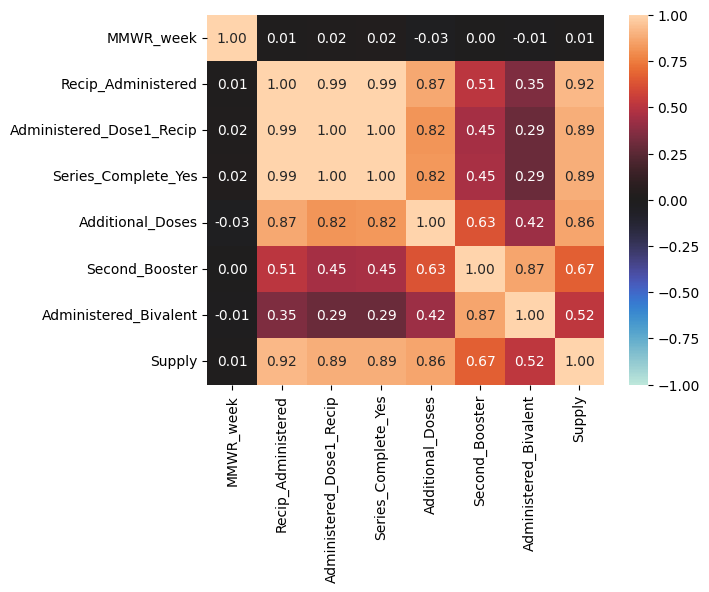

In [19]:
vaccine_corr = vaccine_eda.select_dtypes(include='number')
vaccine_corr = vaccine_eda.fillna(0) 
sns.heatmap(vaccine_corr.corr(), vmin=-1, vmax=1, center=0, annot=True, fmt='.2f')

Supply follows a similar trend as Distributed and Administered, except the correlation is slightly lower. There's an 86-87% correlation between Supply and completion of the Series. As supply decreases, the correlation in stages of therapy does as well.

It may be a stretch, but let's try to plot the correlations on the y axis accross the different stages on the x axis. Looking at the heatmap above it's already to ready it as a time series graph by how the stages are ordered at the bottom.

/home/jeremy/Documents/GitHub/DSC530/env/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "orientation" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/home/jeremy/Documents/GitHub/DSC530/env/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "facecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/home/jeremy/Documents/GitHub/DSC530/env/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "edgecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/home/jeremy/Documents/GitHub/DSC530/env/lib/py

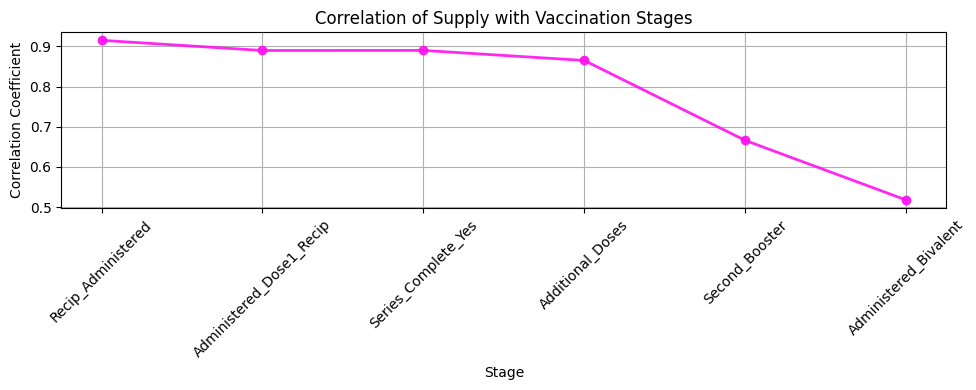

In [20]:
import matplotlib.pyplot as plt

# Define stage columns
stages = ['Recip_Administered', 'Administered_Dose1_Recip', 'Series_Complete_Yes',
          'Additional_Doses', 'Second_Booster', 'Administered_Bivalent']

# Compute correlations between Supply and each stage
supply_corr = vaccine_eda[stages + ['Supply']].corr()['Supply'].drop('Supply')

# Plot
plt.figure(figsize=(10, 4))
supply_corr.plot(kind='line', marker='o', linewidth=2, alpha=0.9, color='#FF10F0')  # Neon pink

plt.title('Correlation of Supply with Vaccination Stages')
plt.ylabel('Correlation Coefficient')
plt.xlabel('Stage')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


The above graph shows the correlation between supply and the completed stages decreasing as time.

What we would really like know now is if Supply is statistically significant to the different stages of completion. For this a Linear Regression model can be applied.

<b>Linear Regression</b>
#####

In order to perform Linear Regression the data will need to be converted into long format with the Stages of comletion as the x and Supply as the y.

Linear regression models the relationship between a dependent varaible and one or more independent variables using a linear equation. In this case, the dependent variable is `Supply` and the independent variables are the different patient outcomes (or stages of completion).

In [21]:
# Build stage column headers
stages = ['Recip_Administered', 'Administered_Dose1_Recip', 'Series_Complete_Yes', 'Additional_Doses', 'Second_Booster', 'Administered_Bivalent']

# Prepare data for anova by melting 
anova = vaccine_eda.melt(id_vars=['Supply'], value_vars=stages, # Make supply the values
                                  var_name='Stage', value_name='StageValue') # Stages are the fields

The goal is to determine if at least one predictor significantly contributes to the outcome.

The module `statsmodels` offers a way to perform Linear Regression and show the results in a summary. Since we have multiple y values, only the R-squared and p value will be extracted.

In [22]:
import statsmodels.api as sm

X = vaccine_eda[['Supply']]
X = sm.add_constant(X)

for stage in ['Recip_Administered', 'Administered_Dose1_Recip', 'Series_Complete_Yes',
              'Additional_Doses', 'Second_Booster', 'Administered_Bivalent']:
    y = vaccine_eda[stage]
    model = sm.OLS(y, X).fit()
    print(f"{stage}:\nR-squared: {model.rsquared:.3f}, p-value: {model.f_pvalue:.3e}, MSE: {model.mse_resid:.3f}\n")


Recip_Administered:
R-squared: 0.837, p-value: 0.000e+00, MSE: 459232911082913.188

Administered_Dose1_Recip:
R-squared: 0.792, p-value: 0.000e+00, MSE: 134172641156494.812

Series_Complete_Yes:
R-squared: 0.792, p-value: 0.000e+00, MSE: 95531289873629.484

Additional_Doses:
R-squared: 0.748, p-value: 0.000e+00, MSE: 15035056064715.451

Second_Booster:
R-squared: 0.443, p-value: 0.000e+00, MSE: 1126376263654.401

Administered_Bivalent:
R-squared: 0.268, p-value: 0.000e+00, MSE: 1405490805782.905



<b>R-Squared and P Values</b>
#####

According the the R-square and p values above, the earlier stages can be explained by Supply. However, beyond Additional Doses, Supply becomes less effective. This suggests that other controlling variables may be at play.

<b>c. Explain the test statistics results, interpret p-values and draw conclusion  </b>

####

A p-value of 0 means there is strong statistical evidence to support the null hypothesis. In other words, <b>we can accept the null hypothesis</b>.

### <b>Regression and Classification</b>

To check the accuracy of our linear regression model further, we could find the error size with RMSE and run a residuals analysis.

<b>a. Regression Analysis</b>

####

RSME Score
#####

The RMSE measures the average magnitude of the prediction error. The closer an RMSE score is to zero the more accurate the prediction was. It is calculated by squaring the MSE.

In the output above,  the MSE is shown. Below we convert it to RSME scores.

In [23]:
from sklearn.linear_model import LinearRegression
for stage in ['Recip_Administered', 'Administered_Dose1_Recip', 'Series_Complete_Yes',
              'Additional_Doses', 'Second_Booster', 'Administered_Bivalent']:
    y = vaccine_eda[stage]
    
    mask = y.notna()
    y = y[mask]
    X_stage = X.loc[mask]
    
    lm = LinearRegression()
    lm.fit(X_stage, y)
    
    y_pred = lm.predict(X_stage)
    rmse = np.sqrt(mean_squared_error(y, y_pred))
    nrmse = rmse / y.mean()
    
    print(f"{stage}\nRMSE: {rmse:.3f}\nNRMSE: {nrmse:.3%}\n")


Recip_Administered
RMSE: 21429163.479
NRMSE: 180.113%

Administered_Dose1_Recip
RMSE: 11582990.502
NRMSE: 197.968%

Series_Complete_Yes
RMSE: 9773756.988
NRMSE: 201.565%

Additional_Doses
RMSE: 3877405.676
NRMSE: 307.294%

Second_Booster
RMSE: 1061281.175
NRMSE: 1698.898%

Administered_Bivalent
RMSE: 1185503.172
NRMSE: 1549.250%



Interpreting the above, an RMSE a score of 21M on the `Recip_Administered` on average tells us the predictions were off by about 21 million doses. However, it is in it's raw form currently. By normalizing it we can attempt to improve the interpretability of these scores.

Normalized Root Mean Square Error (NRMSE) provides a standard metric to comapre model performance and it's output can be converted to a percentage. Reading the NRMSE scores below the RMSE the 21M doses, the model is off by 180%. Something comes to mind though:

<i>How much of this error can be explained by the `US` outlier?</i>

To find this out we can remove the US outlier in a new variable created from the `vaccine_eda` variable.


In [24]:
# Reload vaccine data
vax_data = pd.read_csv('/home/jeremy/Documents/GitHub/DSC530/TermProject/data/vax_totals.csv')
vaccine_eda = vax_data
vaccine_eda.head(3)

# Reapply Supply field
vaccine_eda['Supply'] = vaccine_eda['Distributed'] - vaccine_eda['Administered']
vaccine_eda = vaccine_eda.drop(columns=['Distributed', 'Administered'])

# Remove locations that include `US`
cleaned_eda = vax_data[vax_data['Location'] != 'US']
X_clean = X.loc[cleaned_eda.index]  # align X to cleaned_eda

# iterate through stages and print RMSE, NRMSE
for stage in ['Recip_Administered', 'Administered_Dose1_Recip', 'Series_Complete_Yes',
              'Additional_Doses']:
    y = cleaned_eda[stage]
    mask = y.notna()
    y = y[mask]
    X_stage = X_clean.loc[mask]
    
    lm = LinearRegression()
    lm.fit(X_stage, y)
    
    y_pred = lm.predict(X_stage)
    rmse = np.sqrt(mean_squared_error(y, y_pred))
    nrmse = rmse / y.mean()
    
    print(f"{stage}\nRMSE: {rmse:.3f}\nNRMSE: {nrmse:.3%}\n")



Recip_Administered
RMSE: 8893374.979
NRMSE: 145.248%

Administered_Dose1_Recip
RMSE: 4266858.224
NRMSE: 141.625%

Series_Complete_Yes
RMSE: 3590481.629
NRMSE: 143.811%

Additional_Doses
RMSE: 1691516.469
NRMSE: 151.376%



The model improved 20% with the removal of the outlier. However, we did note that all data points in the 'US' location receievd a `Second_Booster` which was not found in any other states. This is likely due to state-specific data not being available for the second booster.

Residual Analaysis
##### 

Residual analysis is a statistical technique used to asses the accuracy of regression models. Through exploring differences between the observed and predicted values, a residual analysis provides information about the aqequacy of the model fit. It is used by researchers and analysts to better undertand the reliablility of the model's results.

Recip_Administered
RMSE: 8893609.704
NRMSE: 145.252%



/home/jeremy/Documents/GitHub/DSC530/env/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "orientation" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/home/jeremy/Documents/GitHub/DSC530/env/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "facecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/home/jeremy/Documents/GitHub/DSC530/env/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "edgecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/home/jeremy/Documents/GitHub/DSC530/env/lib/py

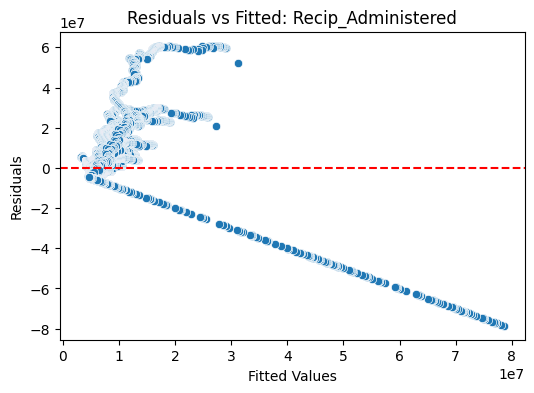

/home/jeremy/Documents/GitHub/DSC530/env/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "orientation" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/home/jeremy/Documents/GitHub/DSC530/env/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "facecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/home/jeremy/Documents/GitHub/DSC530/env/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "edgecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/home/jeremy/Documents/GitHub/DSC530/env/lib/py

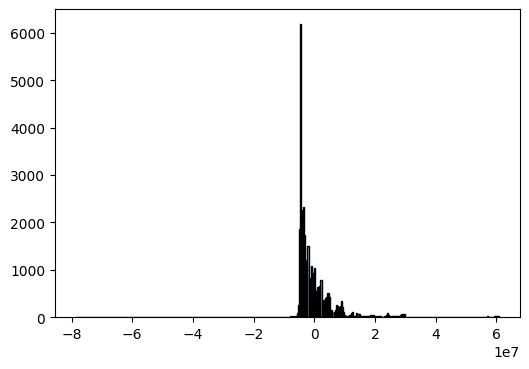

In [25]:
import warnings

try:
    for stage in stages:
        y = cleaned_eda[stage]
        
        mask = y.notna()
        y = y[mask]
        X_stage = X_clean.loc[mask]
        
        model = sm.OLS(y, X_stage).fit()
        rmse = np.sqrt(model.mse_resid)
        nrmse = rmse / y.mean()
        
        print(f"{stage}\nRMSE: {rmse:.3f}\nNRMSE: {nrmse:.3%}\n")
        
        residuals = model.resid
        fitted = model.fittedvalues
        

        # Residuals vs Fitted
        plt.figure(figsize=(6, 4))
        sns.scatterplot(x=fitted, y=residuals)
        plt.axhline(0, color='red', linestyle='--')
        plt.title(f'Residuals vs Fitted: {stage}')
        plt.xlabel('Fitted Values')
        plt.ylabel('Residuals')
        plt.show()

        # Histogram of residuals
        plt.figure(figsize=(6, 4))
        sns.histplot(residuals.to_numpy(), kde=True)
        plt.title(f'Residual Distribution: {stage}')
        plt.xlabel('Residual')
        plt.show()


        # Q-Q Plot
        sm.qqplot(residuals, line='45', fit=True)
        plt.title(f'Q-Q Plot: {stage}')
        plt.show()

except ValueError: # Passing an error saying the hist is no longer supported
    pass

<b>b. Classification Model</b>

####

Since this model is based on a  standard method, we cannot use classifiction techniques nsuch as K Nearest Neighbor that require a supervised classification algorithm. 

Instead to perform classification we'll use K-Mean clustering.

In [26]:
cleaned_eda = vax_data.dropna()  # call the method to get a DataFrame
cleaned_eda['Supply'] = cleaned_eda['Distributed'] - cleaned_eda['Administered']
cleaned_eda = cleaned_eda.drop(columns=['Distributed', 'Administered'])

/tmp/ipykernel_9456/2856845862.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_eda['Supply'] = cleaned_eda['Distributed'] - cleaned_eda['Administered']


/home/jeremy/Documents/GitHub/DSC530/env/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "orientation" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/home/jeremy/Documents/GitHub/DSC530/env/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "facecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/home/jeremy/Documents/GitHub/DSC530/env/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "edgecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/home/jeremy/Documents/GitHub/DSC530/env/lib/py

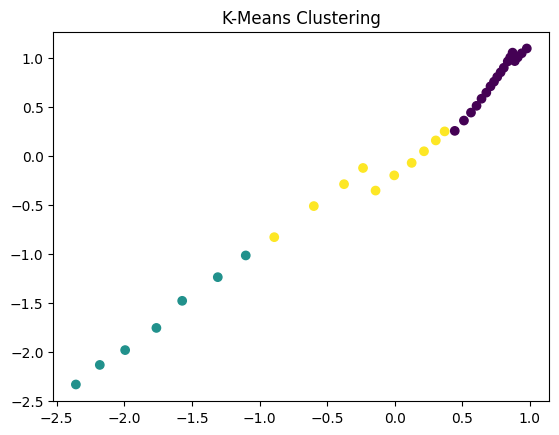

In [27]:

# Define features without dropping rows
features = cleaned_eda[stages + ['Supply']]
features = features.fillna(features.mean())


# Call in the StandardScaler
scaler = StandardScaler()

# and use it on the features
X_scaled = scaler.fit_transform(features)

# Create K-Means model
kmeans = KMeans(n_clusters=3, random_state=42)

# Fit to features
kmeans.fit(X_scaled)

# All the preparation is finally complete.
# We now apply the cluster labels back to cleaned_eda
cleaned_eda.loc[features.index, 'Cluster'] = kmeans.labels_

# Plot the clusters using the first two scaled features
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=kmeans.labels_)
plt.title('K-Means Clustering')
plt.show()

Some observations we can make from this plot is that the clusters are well-separated. This could indicate that there are meaningful differences in the stages of completion driven by Supply.

Obviously these clusters resemble a linear progression. This is because the phases are from the same underlying process (rate of Supply).

### <b>Advanced Analysis Techniques</b>

<b>a. Clustering Analysis</b>

####

Another way we can plot the KMeans Cluster is through a Principal Component Analysis (PCA). With new a new dimension, we can capture the maximum variance of the data.

A PCA helps us understand which original features contribute most to each principal component.

<Figure size 500x300 with 0 Axes>

/home/jeremy/Documents/GitHub/DSC530/env/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "orientation" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/home/jeremy/Documents/GitHub/DSC530/env/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "facecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/home/jeremy/Documents/GitHub/DSC530/env/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "edgecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/home/jeremy/Documents/GitHub/DSC530/env/lib/py

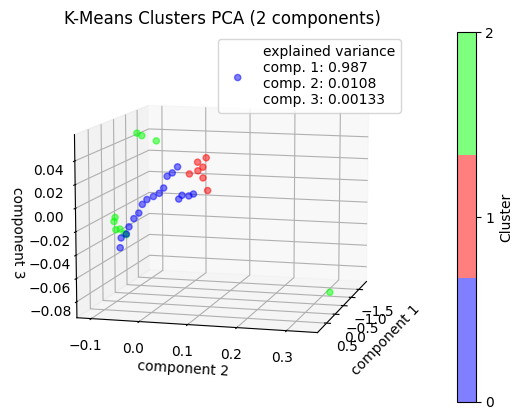

In [28]:
# Using the existing cluster labels
plt.figure(figsize=(5, 3))
# we apply them to the pca_scatter function from ml_utils
pca_scatter_3d(features, kmeans.labels_, 'Cluster') 

# plot the results
plt.title('K-Means Clusters PCA (2 components)')
plt.show()

A 3D PCA reveals that the true form of this data is likely a 2D curve. Not much insight can be derived from a PCA in the third dimension.

/home/jeremy/Documents/GitHub/DSC530/env/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "orientation" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/home/jeremy/Documents/GitHub/DSC530/env/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "facecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/home/jeremy/Documents/GitHub/DSC530/env/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "edgecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/home/jeremy/Documents/GitHub/DSC530/env/lib/py

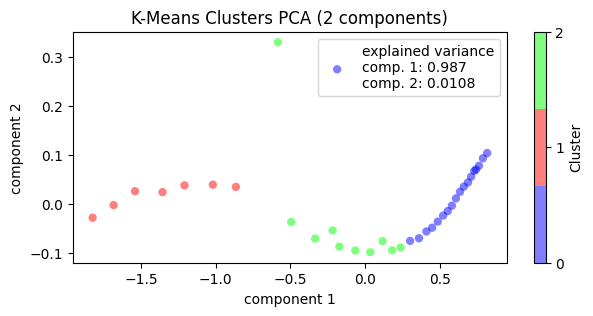

In [29]:
# Using the existing cluster labels
plt.figure(figsize=(7, 3))
# we apply them to the pca_scatter function from ml_utils
pca_scatter(features, kmeans.labels_, 'Cluster') 

# plot the results
plt.title('K-Means Clusters PCA (2 components)')
plt.show()

It's also clear from this 2D form that the PCA results resemple a parabolic curve. This would suggest the suppy data has a non-linear relationship with the completion stages. They instead follow a curved progression.

In [30]:

# Optional: Show cluster distribution
print("Cluster distribution:")
unique, counts = np.unique(kmeans.labels_, return_counts=True)
for cluster, count in zip(unique, counts):
    print(f"Cluster {cluster}: {count} points ({count/len(kmeans.labels_)*100:.1f}%)")

Cluster distribution:
Cluster 0: 18 points (51.4%)
Cluster 1: 7 points (20.0%)
Cluster 2: 10 points (28.6%)


Analyzing the results further it appears the largest is Cluster 0 with 18 points which explains 51.4% of the data.

<b>b. Machine Learning approach to Regression or Classification</b>

####

### Approach Introduction

In this approach, we will be predicting the population of the different stages using Supply. Machine learning brings powerful perspective to the data by allowing us make decisions based on future values.

Perhaps in an effort to cut costs, drug manufacturers need to figure out if changing supply will affect how long people will continue taking the vaccine. The answer may be obvious, but it is meaningful to have confirmation and exact knowledge of at what stage this might happen.

In the Exporatory Data Analysis performed prior, it was shown that supply is negatively affected most after the first stage of `Additional_Doses`. Supply numbers start to decrease in correlation with the stage after this and the cause is supported by the accruacy of the Linear Regression model and p value of 0.

Taking a machine learning approach helps clear the uncertainty. Given more time, would the Supply numbers increase or decrease further? This question can be answered with the `RandomForestClassifier` from sklearn.

### Background Information

##### About Random Forest and Ensemble Methods

The RandomForest Classifier is an <b>ensamble method</b> which combines many models to create stronger ones that will minimize bias (average error between ovsesved and predicted values), or minimuze the variance.

This matters because the aim is to balance between overfitting and underfitting. Overfitting happens when the variables of complex models is too high. Underfitting occurs when the simple models used in the emsamble method have too high of a bias.

##### Why Random Forest?

Since the PCA plot showed a parabolic pattern, it is a non-linear relationship which RandomForsest is suited to process.

#### Random Forest

Begin preparing the Data

In [31]:
# Prepare data
X = features
y = kmeans.labels_

Run test train split

In [32]:
# Split and train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


Let's revisit the PCA 3D scatterplot with the new prediction data. 

In [33]:

# Evaluate
y_pred = model.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred):.3f}")

# Prediction function
def predict_cluster(stage_values):
    input_data = [[stage_values[stage] for stage in stages]]
    return model.predict(input_data)[0]

Accuracy: 1.000


### Predictions

Plot the predictions using a PCA scatter plot.

/home/jeremy/Documents/GitHub/DSC530/env/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "orientation" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/home/jeremy/Documents/GitHub/DSC530/env/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "facecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/home/jeremy/Documents/GitHub/DSC530/env/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "edgecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/home/jeremy/Documents/GitHub/DSC530/env/lib/py

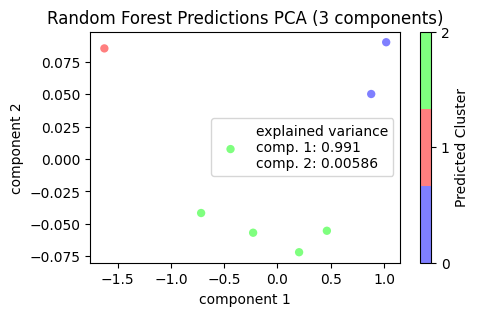

In [34]:
# Plot Random Forest predictions on test set
plt.figure(figsize=(5, 3))
pca_scatter(X_test, y_pred, 'Predicted Cluster')
plt.title('Random Forest Predictions PCA (3 components)')
plt.show()


The organized nature of this PCA plot aligns with the accuracy. Clusters do not overlap and PC1 is almost perfectly 1-dimensional. It follows a consistent pattern much like the PCA plot before. 

A 100% accuracy may seem strange, and it very well could be. This might be the result of overfitting, even with RandomForsest. Or it could be that these predictions were too obvious for such a complex model. There wouldn't be enough data variation to make complex accurate predictions.

### <b>Conclusion</b>

In this notebook we explored the affects of Supply of the different stages of COVID-19 vaccine comepletion. By creating a `Supply` field correlation was found at it's highest in the early stages of patient therapy but stopped growth after the first completed Series and started to decline after any Additional Doses before the Second Booster.

Identifying outliers, the US value from the `Location` field held all of the population in the Second Booster. However, it was found that this was not reflected in the data and each stage can be analyzed independently.

The null hypothesis was accepted that Supply has an affect on the stages of vaccine completion. At least one of the stages are affected by supply, and the performed predictions support this hypothesis.